# Employee Resignation Analysis in Queensland's Education Institutes

In this project, I'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

## Project Objectives:
In this project, I'll play the role of data analyst and pretend that stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Quick Summary of Findings:
The analysis of employee exit surveys in Queensland's education institutes reveals that:

* Short-tenured and veteran employees resign due to dissatisfaction. 
* Dissatisfaction is prominent among employees aged 25 to 50, with minimal resignations in younger and older age groups. 
* Female employees account for the majority of dissatisfied staff. 
* Non-teaching staff in DETE and new employees in TAFE exhibit higher dissatisfaction rates. 
* Permanent full-time roles in DETE and temporary part-time roles in TAFE are associated with higher dissatisfaction. 

Targeted measures to address these insights can enhance employee satisfaction and retention in both institutes.

## Data Dictionary
A data dictionary wasn't provided with the dataset. But for this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns I'll work with from the `dete_survey.csv`:

* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns I'll work with from the `tafe_survey.csv`:

* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

## Part 1: Data Exploration

To begin this analysis, I first start by doing a basic exploration of the dataset to better understand the imformation contained in our dataset. 

To better understand the dataset, I'll;
* Check the number of rows and columns
* Check if there are missing values
* Identity dtypes of each columns, and identify numerical and categorical columns
* Identify the distribution of values in columns, and the number of unique values in categorical columns
* Check for duplicate and missing values, or inconsistencies on the data
* Get a descriptive statistics for the data


### 1.1: Importing Libraries; Pandas, Numpy, Seaborn, etc

In [1]:
# Importing Libraries
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Reading in the datasets
dete_survey = pd.read_csv('dete_survey.csv', encoding='UTF-8', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='UTF-8')

The `dete_survey` dataframe contains 'Not Stated' values to indicate that there are are missing, but they aren't represented as NaN. To handle this, I'll read the `dete_survey.csv` CSV file into pandas to read the `Not Stated` values in as `NaN`, by setting the `na_values` parameter to `Not Stated`.

### 1.2: Exploring datasets

In [3]:
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [5]:
# Number of rows and columns in each df
print(f"Number of rows and columns in dete_survey dataset: {dete_survey.shape}")
print(f"\nNumber of rows and columns in tafe_survey dataset: {tafe_survey.shape}")

Number of rows and columns in dete_survey dataset: (822, 56)

Number of rows and columns in tafe_survey dataset: (702, 72)


In [6]:
# Identity dtypes of each columns, and identify numerical and categorical columns

print(f"Number of string columns in the dete_survey df: {len(dete_survey.select_dtypes(include='O').columns)}")
print(f"\nNumber of columns with numerical and boolean values in the dete_survey df: {len(dete_survey.select_dtypes(exclude='O').columns)}")

Number of string columns in the dete_survey df: 35

Number of columns with numerical and boolean values in the dete_survey df: 21


In [7]:
# Identity dtypes of each columns, and identify numerical and categorical columns

print(f"Number of string columns in the tafe_survey df: {len(tafe_survey.select_dtypes(include='O').columns)}")
print(f"\nNumber of numerical columns in the tafe_survey df: {len(tafe_survey.select_dtypes(exclude='O').columns)}")

Number of string columns in the tafe_survey df: 70

Number of numerical columns in the tafe_survey df: 2


In [8]:
dete_survey.select_dtypes(include=object).describe()

,SeparationType,Cease Date,Position,Classification,Region,Business Unit,Employment Status,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822,788,817,455,717,126,817,808,735,816,788,817,815,810,813,812,813,811,767,746,792,768,814,812,816,813,766,793,798,811,16,3,7,23,32
unique,9,24,15,8,8,14,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,10,1,1,1,1,1
top,Age Retirement,2012,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,285,344,324,161,135,54,434,413,242,335,357,467,359,342,349,401,396,372,345,246,348,293,399,400,436,401,253,386,573,222,16,3,7,23,32


### Insights:
Just by looking at the descriptive statistics for the categorical values in the dete_survey dataset, it's clear that:
* Majority of survey participants were teachers in a permanent full time position
* And most of them left employment due to age retirement 

In [9]:
tafe_survey.select_dtypes(include=object).describe()

,Institute,WorkArea,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?,InductionInfo. Induction

At first glance, the descriptive statistics for the tafe_survey dataset tells us that:
* Majority of the survey participants resigned from their position due to dissatisfaction. This is contrary to what we saw in the dete_survey dataset.

## Part 2: Data Cleaning

### 2.1: Checking for duplicate and missing values

In [10]:
#Checking for missing values
null_cols = dete_survey.isnull().sum() > 0

dete_survey.isnull().sum()[null_cols]

Cease Date                      34
DETE Start Date                 73
Role Start Date                 98
Position                         5
Classification                 367
Region                         105
Business Unit                  696
Employment Status                5
Professional Development        14
Opportunities for promotion     87
Staff morale                     6
Workplace issue                 34
Physical environment             5
Worklife balance                 7
Stress and pressure support     12
Performance of supervisor        9
Peer support                    10
Initiative                       9
Skills                          11
Coach                           55
Career Aspirations              76
Feedback                        30
Further PD                      54
Communication                    8
My say                          10
Information                      6
Kept informed                    9
Wellness programs               56
Health & Safety     

In [11]:
#Checking for missing values
null_cols = tafe_survey.isnull().sum() > 0

tafe_survey.isnull().sum()[null_cols]

CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
Contributing Factors. Career Move - Public Sector                            265
Contributing Factors. Career Move - Private Sector                           265
Contributing Factors. Career Move - Self-employment                          265
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 69, dtype: int64

Apparently, the two datasets have lots of missing values, so there's plenty of cleaning to be done. 

But, I need to identify columns that are irrelevant to this analysis and drop those columns. This is especially important because the two datasets contain many columns that I may not need to complete the analysis. So I'll start by dropping irrelevant columns. 

To harmonize and simplify the data, I identified the unnecessary columns and dropped them.

### 2.2: Dropping irrelevant columns

In [12]:
# Identifying irrelevant columns
dete_survey.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [13]:
# Dropping unnecssary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

dete_survey_updated.shape

(822, 35)

We repeat the same process for the `tafe_survey` dataset, and drop columns 17 to 66.

In [14]:
# Dropping unnecssary columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

tafe_survey_updated.shape

(702, 23)

### 2.3: Cleaning column names

Each dataframe contains many of the same columns, but the column names are different. 

The columns with similar information in both datasets need to be harmonized because at some point in this analysis, I'll have to combine these two datasets, therefore, I want the column names to be standardized.

Let's take a look at columns from both datasets with similar information.

|dete_survey column names| tafe_survey column names|	Column definition
| --- | --- | --- |
|ID	| Record ID |	An id used to identify the participant of the survey
| SeparationType	| Reason for ceasing employment	| The reason why the participant's employment ended
| Cease Date	| CESSATION YEAR	| The year or month the participant's employment ended
| DETE Start Date	|  |	The year the participant began employment with the DETE
| | LengthofServiceOverall.Overall Length of Service at Institute (in years)	| The length of the person's employment (in years)
| Age | 	CurrentAge. | Current Age	The age of the participant
| Gender	| Gender. What is your Gender?	| The gender of the participant

Now that I've identified columns from both dataframes with similar information, I'll go ahead and rename these columns. The goal is to give columns with similar information the same column name. 

In [15]:
# Renaming columns in dete df
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('/','')

# Inspecting the new columns names
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternityfamily', 'relocation', 'studytravel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [16]:
# Renaming columns in the tafe df

tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

# Inspecting the new columns names
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### 2.4: Filtering the Data


I renamed the columns that I'll use for this analysis. Next, I'll filter the data to remove more of the data I don't need.

Recall that the end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
* What about employees who have been at the job longer?

Therefore, I'm only interested in parts of the data that indicate that the employees resigned from their job. 

I'll start by filtering the data in `separtiontype` columns of both dataframes. This data indicated by employees left their jobs.

In [17]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [18]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

For the purpose of this project, I'm only interested in survey respondents who resigned their positions, so I'll be looking at only rows where `separationtype` contains the string `Resignation`.

If you look closely, you will also notice other values related to resignation, such as;
* `Resignation-Other reasons`
* `Resignation-Other employer`
* `Resignation-Move overseas/interstate`

I'll proceed to select only the data for survey respondents who have a `Resignation` separation type. And I'll do this for each dataset.

In [19]:
# Selecting data indicating that employees resigned
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype'] == 'Resignation']

# Isolating data indicating that employees resigned
dete_resignations = dete_survey_updated.copy()[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons')|
                                               (dete_survey_updated['separationtype'] == 'Resignation-Other employer')|
                                               (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')]

In [20]:
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [21]:
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

### 2.5: Checking for inconsistencies

Before I proceed with the analysis, I'll also need to check and verify that the data does not contain any errors or inconsistent data. For this, I'll focus mainly on the date columns; `cease_date` and `dete_start_date` columns.

There are few things I have in mind:
* The first is that since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment,  it wouldn't make sense to have years after the current date.

* And secondly, most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

With these in mind, I'll carefully examine the columns for any logical inconsistencies. 

In [22]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

The first to notice is that the entries for this column are not uniform. Some have the month and year, while others are recorded as only year. 

I will have to quickly clean up this column, and store the values as only years. 

In [23]:
# Cleaning up the cease_date column with vectorized string method
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1)

# Convert the dates to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')

# Inspecting the values
dete_resignations['cease_date'].value_counts(dropna=False)

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

Next, we inspect the `cease_date` column in the `tafe_resignations` dataset

In [24]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

We proceed to inspect the `dete_start_date` column.

In [25]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
2003.0     6
1992.0     6
1996.0     6
1998.0     6
2002.0     6
1990.0     5
1997.0     5
1980.0     5
1993.0     5
1989.0     4
1991.0     4
1988.0     4
1995.0     4
1986.0     3
2001.0     3
1985.0     3
1983.0     2
1976.0     2
1974.0     2
1975.0     1
1984.0     1
1971.0     1
1982.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
Name: dete_start_date, dtype: int64

Everything looks good so far.

To better appreciate the distribution of values in these columns, I will use boxplots to visualize the data.

<AxesSubplot:>

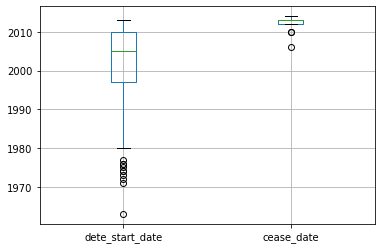

In [26]:
dete_resignations.boxplot(column=['dete_start_date', 'cease_date'], meanline=True)

<AxesSubplot:>

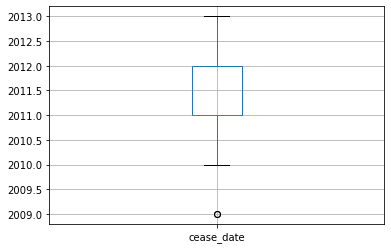

In [27]:
tafe_resignations.boxplot(column='cease_date', meanline=True)

There are some outliers, but I'll leave the data as is because nothing really looks out of place. 

From what I have done so far, I can verify:

* There aren't any major issues with the years.
* The years in each dataframe don't span quite the same number of years.

### 2.6: Calculating years of service

Now that I've verified the years in the `dete_resignations` dataframe, I'll use them to create a new column. The end goal of this analysis is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

The length of time an employee spent in a workplace is referred to as their years of service. And that is needed to answer the questions above. 

The `tafe_resignations` dataframe already contains a "service" column, which was renamed to `institute_service`. In order to analyze both surveys together, I'll have to create a corresponding `institute_service` column in `dete_resignations`.

In [28]:
# Create an institute_service column in dete_resignations
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [29]:
# Inspecting the new column
dete_resignations['institute_service'].value_counts(bins=10)

(-0.05, 4.9]    92
(4.9, 9.8]      75
(9.8, 14.7]     30
(14.7, 19.6]    26
(19.6, 24.5]    24
(24.5, 29.4]     8
(29.4, 34.3]     8
(34.3, 39.2]     7
(39.2, 44.1]     2
(44.1, 49.0]     1
Name: institute_service, dtype: int64

> The new `institute_service` column I created will be used to analyze survey respondents according to their length of employment.

### 2.7: Identifying dissatisfied employees

Next, I'll identify any employees who resigned because they were dissatisfied.

Below are the columns I'll use to categorize employees as "dissatisfied" from each dataframe. 

`tafe dataset`:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

`dete dataset`:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

If the employee indicated any of the factors above caused them to resign, I'll mark them as dissatisfied in a new column.

The new column I intend to create will contain `True` and `False` values:
* `True`: indicates that the employee was dissatisfied with their job (that is; if any element in the selected columns above is True)
* `False`: indicates that the employee was not dissatisfied with their job (that is; if none of the elements in the selected columns above is True)

In [30]:
# Exploring the values in Contributing Factors. Job Dissatisfaction and Contributing Factors. Dissatisfaction columns
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [32]:
def update_vals(col):
    """
    This function will update the values in the 
    dissatisfaction columns of the tafe dataset
    """
    if col == '-':
        return False
    elif pd.isnull(col):
        return np.nan
    else:
        return True

In [33]:
# Creating a new column with updated values for dissatisfaction: True or False
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                                                       'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=True)

# Exploring the new 'dissatisfied' column
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    249
True      91
Name: dissatisfied, dtype: int64

In [34]:
# Updating the values in dissatisfaction-related columns with True or False
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [35]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternityfamily', 'relocation', 'studytravel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied'],
      dtype='object')

In [36]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied'],
      dtype='object')

In [37]:
# Find the intersect (common items) in both columns
common_columns = np.intersect1d(dete_resignations.columns, tafe_resignations.columns)

In [38]:
common_columns

array(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute_service', 'position', 'separationtype'],
      dtype=object)

### 2.8: Combining the dataframes

Before combining the two dataframes, I'll add a column to each dataframe that will help to easily distinguish between the two.

In [39]:
# Differentiating each dataframe with a unique identifier column
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

In [40]:
# Combining the two dataframes
combined = pd.concat([dete_resignations, tafe_resignations], ignore_index=True)

In [41]:
combined.sample(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternityfamily,relocation,studytravel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute,Institute,WorkArea,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
214,5.860000e+02,Resignation-Move overseas/interstate,2013.0,2012.0,2013.0,Teacher Aide,NaN,NaN,NaN,Temporary Full-time,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN,1.0,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2.940000e+02,Resignation-Move overseas/interstate,2012.0,NaN,NaN,Schools Officer,NaN,South East,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,NaN,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,6.342062e+17,Resignation,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE,Sunshine Coast Institute of TAFE,Non-Delivery (corporate),Career Move - Public Sector,Career Move - Private Sector,-,-,-,-,-,-,-,-,Other,-,NaN


The new dataframe has columns with many null values. Columns with too many missing values will be dropped.

In [42]:
combined.isnull().sum().sort_values(ascending=False)

torres_strait                                          651
south_sea                                              648
aboriginal                                             644
disability                                             643
nesb                                                   642
business_unit                                          619
classification                                         490
region                                                 386
role_start_date                                        380
dete_start_date                                        368
role_service                                           361
employment_conditions                                  340
none_of_the_above                                      340
work_life_balance                                      340
traumatic_incident                                     340
ill_health                                             340
studytravel                                            3

Iill drop columns with more than more than 500 missing values.

In [43]:
# Dropping columns
combined.dropna(thresh=500, axis=1, inplace=True)

# Inspecting the new dataset
combined.isnull().sum().sort_values(ascending=False)

institute_service    88
gender               59
age                  55
employment_status    54
position             53
cease_date           16
id                    0
separationtype        0
dissatisfied          0
institute             0
dtype: int64

In [44]:
combined.sample(5)

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
164,4.550000e+02,Resignation-Move overseas/interstate,2013.0,Public Servant,Permanent Full-time,Female,56-60,0.0,True,DETE
174,4.780000e+02,Resignation-Move overseas/interstate,2013.0,Cleaner,Permanent Full-time,Male,46-50,9.0,False,DETE
226,6.130000e+02,Resignation-Other reasons,2013.0,Teacher,Permanent Part-time,Female,51-55,20.0,False,DETE
317,6.341588e+17,Resignation,2010.0,Administration (AO),Permanent Full-time,Female,21 25,1-2,False,TAFE
550,6.347949e+17,Resignation,2012.0,Teacher (including LVT),Permanent Part-time,Male,56 or older,1-2,True,TAFE


### 2.9: Cleaning the 'institute_service' column

Next is to clean the `institute_service` column.

In [45]:
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2


The `institute_service` column is very messy. It contains data that is stored in different formats. 

One way to clean this column is to create categories for the years. And then group the years of service and place them in categories. 

Here are the categories I'll use and their definitions

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [46]:
# Extracting the years of service from the institute_service column
combined = combined.copy()

pattern = r"(\d+)" # regex pattern to match one or more repetitions of numbers between the range [0-9]

combined['institute_service'] = combined['institute_service'].astype('str').str.extract(pattern).astype('float')

In [47]:
# We define a function for categorizing the service years
def categorize(val):
    if val <= 3:
        return 'New'
    elif val <= 6:
        return 'Experienced'
    elif val <= 10:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    else:
        pd.isnull(val)
        return np.nan
    

# Applying the function to the create a new column (service_category)
combined['service_category'] = combined['institute_service'].apply(categorize) 
combined.drop('institute_service', axis=1, inplace=True)

combined['service_category'].value_counts(dropna=False)

New            276
Veteran        136
Experienced     89
NaN             88
Established     62
Name: service_category, dtype: int64

### 2.9: Cleaning the 'age' column

In [48]:
# Exploring the age column
combined['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

The `age` column is just as messy as the `institute_service` column once was. I'll clean it up and categorize it just like we did with the `institute_service` column.

However, I'll create 3 groups for the `age` category. Each group will represent employee in different stages of their career, for instance, I'll have:
* Group 1: (24 and below) this group is for young people just entering the labour market
* Group 2: (25 to 54) this group is for employee in their prime working lives
* Group 3: (54 and above) this group is employee who have passed the peak of their careers and entering the retirement age.

In [49]:
combined['age'] = combined['age'].astype('str').str.extract(pattern).astype('float')

combined.age.value_counts(bins=3)

(33.667, 47.333]    247
(19.958, 33.667]    200
(47.333, 61.0]      149
Name: age, dtype: int64

In [50]:
# Define a function to aggregate the age ranges into groups
def aggregate_age(value):
    if value <= 24:
        return 'Group 1: (24 years and below)'
    elif value == 25 or value <= 54:
        return 'Group 2: (25 to 50 years)'
    elif value >= 55:
        return 'Group 3: (55 years and above)'
    else:
        pd.isnull(value)
        return np.nan
    

# Applying the aggregate function to the age column
combined['age_groups'] = combined['age'].apply(aggregate_age)
combined.drop('age', axis=1, inplace=True)

combined['age_groups'].value_counts(dropna=False)

Group 2: (25 to 50 years)        446
Group 3: (55 years and above)     78
Group 1: (24 years and below)     72
NaN                               55
Name: age_groups, dtype: int64

The dataset still has some missing values, let's look at the columns with missing values.

In [51]:
combined.isnull().sum().sort_values(ascending=False)

service_category     88
gender               59
age_groups           55
employment_status    54
position             53
cease_date           16
id                    0
separationtype        0
dissatisfied          0
institute             0
dtype: int64

Among the columns with missing values, the `service_category` and `age_groups` are 2 columns that contain information that are vital to this analysis.

I may have to use some of Pandas built-in methods for filling in missing values.

First, let's see the descriptive statistics of these columns.

In [52]:
combined[['age_groups', 'service_category']].describe()

,age_groups,service_category
count,596,563
unique,3,4
top,Group 2: (25 to 50 years),New
freq,446,276


Since the data points are categorical, I can't just use the mean. meadian or mode values, to fill the missing values. So, I'll proceed to use the forward fill method to fill in the missing values in the dataset. 

A forward fill will ensure that every data point is well-represented and this will prevent a skewed data. Plus the mean will remain the same.

In [53]:
# Filling the missing values
combined['age_groups'] = combined['age_groups'].fillna(method='ffill')
combined['service_category'] = combined['service_category'].fillna(method='ffill')

# combined['age_groups'].value_counts(dropna=False)
combined[['age_groups', 'service_category']].describe()

,age_groups,service_category
count,651,651
unique,3,4
top,Group 2: (25 to 50 years),New
freq,490,315


### 2.9.1: Cleaning the 'gender' & 'employment_status' columns

Next is to examine the `employment_status` and `gender` columns. 

In [54]:
combined['employment_status'].value_counts(dropna=False)

Permanent Full-time    256
Permanent Part-time    150
Temporary Full-time    120
NaN                     54
Temporary Part-time     37
Contract/casual         29
Casual                   5
Name: employment_status, dtype: int64

The data in the `employement_status` needs a little bit of cleaning. I'll do that quickly:

In [55]:
mapping_dict = {
    'Permanent Full-time': 'Permanent Full-time',
    'Permanent Part-time': 'Permanent Part-time',
    'Temporary Full-time': 'Temporary Full-time',
    'Temporary Part-time': 'Temporary Part-time',
    'Contract/casual': 'Contract/casual',
    'Casual': 'Contract/casual',
    'Nan':'Nan',
}

#passing the dict as a argument to series.map()
combined['employment_status'] = combined['employment_status'].map(mapping_dict)
combined['employment_status'].value_counts(dropna=False)

Permanent Full-time    256
Permanent Part-time    150
Temporary Full-time    120
NaN                     54
Temporary Part-time     37
Contract/casual         34
Name: employment_status, dtype: int64

In [56]:
combined['gender'].value_counts(dropna=False)

Female    424
Male      168
NaN        59
Name: gender, dtype: int64

In [57]:
combined[['employment_status', 'gender']].describe()

,employment_status,gender
count,597,592
unique,5,2
top,Permanent Full-time,Female
freq,256,424


Since the `employment_status` and `gender` are categorical columns and the number of missing values in each of the columns are less than 10%. I can also use the forward fill pandas method to fill the null values. 

In [58]:
# Filling the missing values
combined['employment_status'] = combined['employment_status'].fillna(method='ffill')
combined['gender'] = combined['gender'].fillna(method='ffill')

# combined['age_groups'].value_counts(dropna=False)
combined[['employment_status', 'gender']].describe()

,employment_status,gender
count,651,651
unique,5,2
top,Permanent Full-time,Female
freq,278,473


### 2.9.2: Cleaning the 'position' column

In [59]:
combined.isnull().sum().sort_values(ascending=False)

position             53
cease_date           16
id                    0
separationtype        0
employment_status     0
gender                0
dissatisfied          0
institute             0
service_category      0
age_groups            0
dtype: int64

In [60]:
combined['position'].value_counts(dropna=False)

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
NaN                                                         53
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
School Administrative Staff                                  8
Technical Officer                                            8
Schools Officer                                              7
Workplace Training Officer                                   6
Technical Officer (TO)                                       5
School Based Professional Staff (Therapist, nurse, etc)

Since the dataset is from the Department of Education in Australia, all survey respondents were employed in schools as either 'Teaching staff' and 'Non-teaching staff.'

With this mind, I can clean up the `position` column by grouping them in these categories. 

Every position that is concerned with teaching will be classified as 'Teaching staff', while every other role will be collectively grouped as 'Non-teaching staff.'

In [61]:
combined['position'] = combined['position'].fillna(method='ffill')
combined['position'].value_counts(dropna=False)

Administration (AO)                                        174
Teacher                                                    131
Teacher (including LVT)                                    107
Teacher Aide                                                64
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   23
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
Workplace Training Officer                                   8
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
Technical Officer (TO)                                       6
School Based Professional Staff (Therapist, nurse, etc)      5
Guidance Officer                                       

In [62]:
teaching_staff = ['Teacher', 'Teacher (including LVT)', 'Teacher Aide', 'Workplace Training Officer', 
                  'Tutor', 'Guidance Officer']

# Define a function to categorize the values in the position column
def update_position(role):
    if role in teaching_staff:
        return 'Teaching staff'
    else:
        return 'Non-Teaching staff'


# Apply function to the position column
combined['role'] = combined['position'].apply(update_position)

In [63]:
combined['role'].value_counts(dropna=False)

Non-Teaching staff    333
Teaching staff        318
Name: role, dtype: int64

In [64]:
combined.isnull().sum()

id                    0
separationtype        0
cease_date           16
position              0
employment_status     0
gender                0
dissatisfied          0
institute             0
service_category      0
age_groups            0
role                  0
dtype: int64

In [65]:
combined['service_category'].value_counts()

New            315
Veteran        154
Experienced    108
Established     74
Name: service_category, dtype: int64

I have successfully cleaned up our dataset and effectively handled the missing values, except for the `cease_date.` But I don't really need that column for this analysis, so I can ignore it for now and proceed to the next step of the data analysis.

## Part 3: Data Analysis 1

At the start of this project, I defined our objectives for this project, and that is to find out:

* If employees who only worked for the institutes for a short period of time are resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* If younger employees are resigning due to some kind of dissatisfaction? What about older employees?


So, the first step in the analysis is to use the dataset to find answers to the above problems.

To answer the find question, I will examine the `service_category` column, because this column tells us how long each employee worked in each institute before resigning.

And to answer the second question, I will examine the `age_group` column, because this column places each employee that resigned in a certain age group, depending on the employee's age. 

I will first create some functions to simplify the analysis.

In [96]:
def generate_df(df, group_col, count_col):
    """
    Creates a new df from provided arguments
        Params:
            :df (dataframe): dataframe of interest
            :group_col(pandas series): column to group by
            :count_col(pandas series): numerical column to aggregate
        Output:
            A new df showing the percentage of dissatisfied employees.
    """
    new_df = (df.groupby(by=group_col).sum()[count_col]).to_frame()
    new_df['% of total'] = round(df[group_col].value_counts(normalize=True)*100).astype(int)
    new_df = new_df.reset_index()
    return new_df.sort_values(by=['% of total'], ascending=False)


def plot_bar(data_x, data_y, fig = [8,4], colors = '#2e5530', 
             title={'x':1.0, 'y':1.0, 's':'', 'size':10}, 
             text={'x':- 25.9, 'y':- 0.1, 's':'', 'color':''}):
    """
    Plots and customizes a bar plot from provided arguments
        Params:
            :data_x and data_y: input for x and y axis
            :fig: fig size for the bar plot
            :colors: custom color for bar plot
            :title: title of bar plot
            :text: custom label for each bar
        Output:
            A new df showing the percentage of dissatisfied employees.
    """
    plt.style.use('fivethirtyeight')
    plt.figure(figsize =(fig[0], fig[1]))
    
    # Plot bar
    ax = sns.barplot(x=data_y, y=data_x, color=colors, orient='h')
    
    # Customize plot
    ax.text(x=title['x'], y=title['y'], s=title['s'], size=title['size'])
    plt.grid(False)
    ax.set_xticks([])
    plt.xlabel(None)
    plt.ylabel(None)
    
    # Add labels to each bar
    for i, v in enumerate(data_y):
        plt.text(x=int(v)+text['x'], y=int(i)+text['y'], s=str(v)+'%', color=text['color'])

    return ax

### 3.0: What percentage of employees resigned due to dissatisfaction?

Here I'll compare the percentage of resignations from employees who worked for the institute in a short period vs employees for worked for longer.

In other words, I'm investigating the percentage of dissatisfation by length of service. 

<AxesSubplot:>

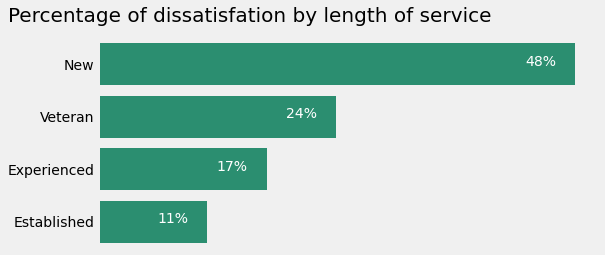

In [98]:
# percentage of dissatisfation by length of service
dissatisfaction_by_service_year = generate_df(combined, 'service_category', 'dissatisfied')

plot_bar(dissatisfaction_by_service_year.service_category, dissatisfaction_by_service_year['% of total'], fig=[8,3.6], colors='#1b9e77',
         title={'x':-9, 'y':-0.8, 's':'Percentage of dissatisfation by length of service', 'size':20},
         text={'x':-5, 'y':+0.03, 's':'', 'color':'w'})


The table above tells us that majority of dissatisfied employees only worked in the institute for a relatively short time. 

#### Insight:
* We can clearly see that 48% of dissatisfied employees worked for the institute for a relatively short time.
* This is followed by veteran employees (employee who have worked for the longest time), who make up 24% of dissatisfied employees.

### 3.1: Percentage of dissatisfied employees by age

Here, I'll examine how many people in each age group resigned due to some kind of dissatisfaction.

([<matplotlib.axis.YTick at 0x26dfa686ee0>,
 [Text(0, 0, '25 to 50 years'),
  Text(0, 1, '55 years and above'),
  Text(0, 2, '24 years and below')])

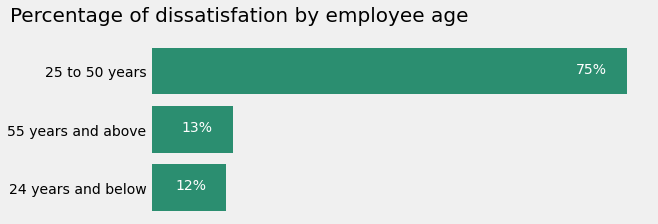

In [100]:
# percentage of dissatisfation by age
dissatisfied_employees_by_age = generate_df(combined, 'age_groups', 'dissatisfied')

plot_bar(dissatisfied_employees_by_age.age_groups, dissatisfied_employees_by_age['% of total'], fig=[8,3], colors='#1b9e77',
         title={'x':-22, 'y':-0.85, 's':'Percentage of dissatisfation by employee age', 'size':20},
         text={'x':-8, 'y':+0.03, 's':'', 'color':'w'})

plt.yticks(range(3), ['25 to 50 years', '55 years and above', '24 years and below'], rotation=0)

From the chart above, we can see that most of the employees that resigned fall in the age group of 25 to 50 years. These are people in their prime working lives. Which can explain why they're resigned, since they're in their prime, it's possible that their resignation is because they were dissatisfied with their role and wanted a career change.

We can also see that the young employees who are just entering into the job market (from 24 years and below), have the least resignation, which is closely follwed by older employees. 

### 3.2: Percentage of dissatisfied employees by gender

<AxesSubplot:>

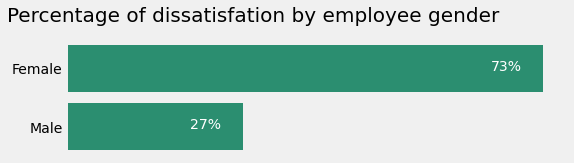

In [299]:
# percentage of dissatisfation by gender
dissatisfied_employees_by_gender = generate_df(combined, 'gender', 'dissatisfied')

plot_bar(dissatisfied_employees_by_gender.gender, dissatisfied_employees_by_gender['% of total'], fig=[8,2], colors='#1b9e77',
         title={'x':-9, 'y':-0.8, 's':'Percentage of dissatisfation by employee gender', 'size':20},
         text={'x':-8, 'y':+0.03, 's':'', 'color':'w'})

From the chart above, we can see that 73% of dissatisfied employees are female, while only 27% of dissatisfied employees are male.

### 3.3: Percentage of dissatisfied employees by role

<AxesSubplot:>

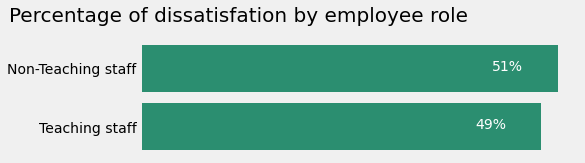

In [300]:
# percentage of dissatisfation by role
dissatisfied_employees_by_role = generate_df(combined, 'role', 'dissatisfied')

plot_bar(dissatisfied_employees_by_role.role, dissatisfied_employees_by_role['% of total'], fig=[7,2], colors='#1b9e77',
         title={'x':-16, 'y':-0.8, 's':'Percentage of dissatisfation by employee role', 'size':20},
         text={'x':-8, 'y':+0.03, 's':'', 'color':'w'})

Non-Teaching staff are slightly more dissatisfied with their job than teaching staff. 

### 3.4: Percentage of dissatisfied employees by employee status

<AxesSubplot:>

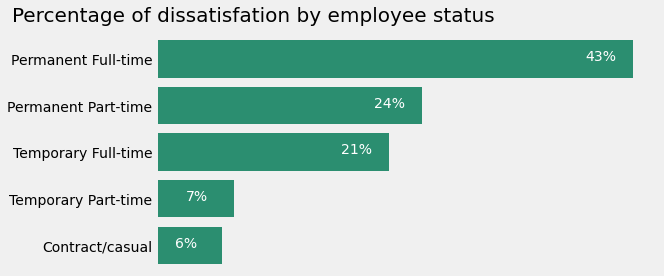

In [106]:
# percentage of dissatisfation by employment status
dissatisfied_employees_by_status = generate_df(combined, 'employment_status', 'dissatisfied')

plot_bar(dissatisfied_employees_by_status.employment_status, dissatisfied_employees_by_status['% of total'], fig=[8,4], colors='#1b9e77',
         title={'x':-13, 'y':-0.8, 's':'Percentage of dissatisfation by employee status', 'size':20},
         text={'x':-4.3, 'y':+0.03, 's':'', 'color':'w'})

The data tells us that employees who hold permanent full-time positions are more dissatisfied that other employees, at 43%. 

## Part 4: Data Anlysis 2

For the second part of this data analysis, I will split the `combined` dataset by the `institute` column to analyze data from each survey separately. 

I'll do the same analysis as before, but this time for each institute.

In [77]:
combined['institute'].value_counts()

TAFE    340
DETE    311
Name: institute, dtype: int64

In [78]:
# split the dataframe on the institute column
dete = combined[combined['institute'] == 'DETE']

tafe = combined[combined['institute'] == 'TAFE']


Before I begin, I'll define another function to help make calculations and generate tables.

In [107]:
def create_df(df1, df2, group_col, count_col):
    first_df = (df1.groupby(by=group_col).sum()[count_col]).sort_values(ascending=False).to_frame()
    first_df['dete_percent'] = round(df1[group_col].value_counts(normalize=True)*100).astype(int)

    first_df = first_df.reset_index()
    first_df.rename(columns = {'dissatisfied':'dete'}, inplace = True)

    second_df = (df2.groupby(by=group_col).sum()[count_col]).sort_values(ascending=False).to_frame()
    second_df['tafe_percent'] = round(df2[group_col].value_counts(normalize=True)*100).astype(int)

    second_df = second_df.reset_index()
    second_df.rename(columns = {'dissatisfied':'tafe'}, inplace = True)
    
    new_df = first_df.set_index(group_col).join(second_df.set_index(group_col))
    new_df = new_df.reset_index()
    return new_df


def plot_bars(data_y, data_x, data_x2, fig = [8,4], left=[-14, 4], colors = ['#A890F0', '#93c47d'], 
             title={'x':15, 'y':4.5, 's':'', 'size':23}, 
             bar1_labels={'x':-14, 'y':-0.05, 's':'', 'color':'w'},
             bar2_labels={'x':-4, 'y':-0.05, 's':'', 'color':'w'},
             chart_titles={'bar1_x':9, 'bar1_y':3.8, 'bar2_x':30, 'bar2_y': 3.8},
             axis_labels={'First_bar': -11.8, 'Second_bar': -12}, xlim=[0.0, 100.0, 0.0, 100.0], y_coord = 3.0):
    
    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=fig)
    
    data_y = list(reversed(data_y))
    data_x = data_x.iloc[::-1]
    data_x2 = data_x2.iloc[::-1]
    
    axes[0].set_xlim(xlim[0], xlim[1])
    axes[0].barh(range(len(data_y)), data_x, left=left[0], height=0.65, align='center', color=colors[0])
    axes[0].text(x=title['x'], y=title['y'], s=title['s'], size=title['size'])
    axes[0].text(x=chart_titles['bar1_x'], y=chart_titles['bar1_y'], s='DETE', size=15, weight='bold', color=colors[0])
    axes[0].grid(False)

    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[0].yaxis.tick_right()
    axes[0].invert_xaxis()


    # Add labels to each bar
    for i, v in enumerate(data_x):
        axes[0].text(x=int(v)+bar1_labels['x'], y=int(i)+bar1_labels['y'], s=str(v)+'%', color=bar1_labels['color'])

    axes[1].set_xlim(xlim[2], xlim[3])
    axes[1].barh(range(len(data_y)), data_x2, left=left[1], height=0.65, align='center', color=colors[1])
    axes[1].set_xticks([])
    axes[1].grid(False)

    axes[1].text(x=chart_titles['bar2_x'], y=chart_titles['bar2_y'], s='TAFE', size=15, weight='bold', color=colors[1])

    for i, z in enumerate(data_x2):
        axes[1].text(x=int(z)+bar2_labels['x'], y=int(i)+bar2_labels['y'], s=str(z)+'%', color=bar2_labels['color'])

    # Adding texts and labels to the chart
    for y_label, x_coord in axis_labels.items():
        axes[1].text(x_coord, y_coord, y_label, size=14)
        y_coord -=1

### 4.0: Percentage of dissatisfied employees by length of service

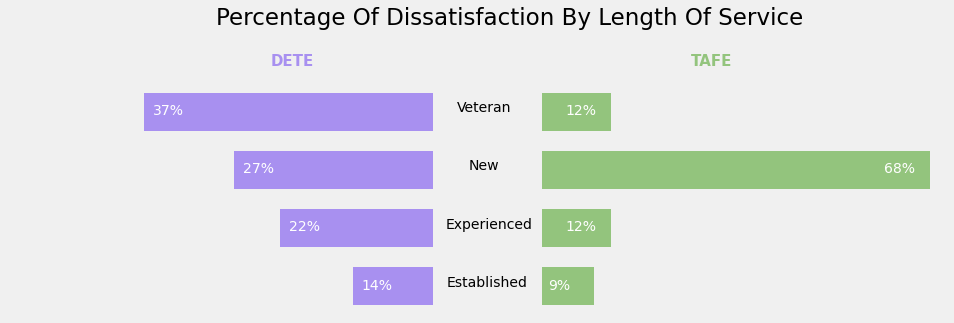

In [124]:
dissatisfaction_by_year = create_df(dete, tafe, 'service_category', 'dissatisfied')

plot_bars(dissatisfaction_by_year.index, dissatisfaction_by_year['dete_percent'], dissatisfaction_by_year['tafe_percent'], fig = [15,4],
          title={'x':15, 'y':4.5, 's':'Percentage Of Dissatisfaction By Length Of Service', 'size':23},
          bar1_labels={'x':-15, 'y':-0.05, 's':'', 'color':'w'},
          axis_labels={'Veteran': -11, 'New': -9, 'Experienced': -13, 'Established': -12.8}, xlim=[-9, 38, 0.0, 75.0])

When looking at each dataset individually, we see a slightly different pattern;
* Veteran employees are the most dissatisfied in DETE (37%)
* While new employees are the most dissatisfied in TAFE (68%)

In fact, the percentage of dissatisfied veteran employees in TAFE is very low, compared to that of DETE. 

### 4.1: Percentage of dissatisfied employees by age

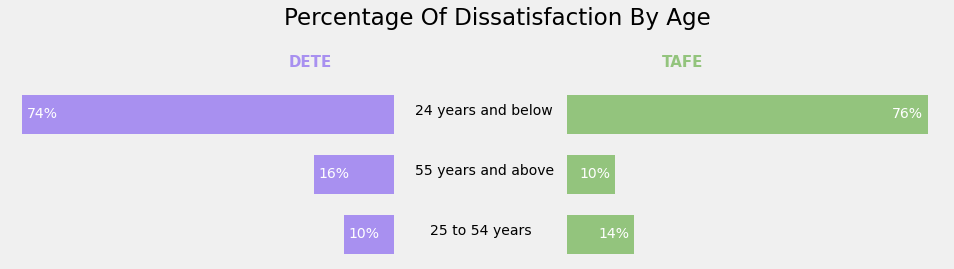

In [316]:
dissatisfaction_by_age = create_df(dete, tafe, 'age_groups', 'dissatisfied')

plot_bars(dissatisfaction_by_age.index, dissatisfaction_by_age['dete_percent'], dissatisfaction_by_age['tafe_percent'], fig = [15,3], left=[-12, 10],
          title={'x':10, 'y':3.5, 's':'Percentage Of Dissatisfaction By Age', 'size':23},
          chart_titles={'bar1_x':9, 'bar1_y':2.8, 'bar2_x':30, 'bar2_y': 2.8},
          bar1_labels={'x':-13, 'y':-0.05, 's':'', 'color':'w'},
          bar2_labels={'x':2.5, 'y':-0.05, 's':'', 'color':'w'},
          axis_labels={'24 years and below': -22, '55 years and above': -22, '25 to 54 years': -19}, xlim=[-20, 65, 0.0, 90.0], y_coord = 2.0
)

Here the 2 datasets almost have a similar pattern:
* The overwhelming majority of dissatisfied employees are 24 years and below (over 70% for both datasets). 

### 4.2: Percentage of dissatisfied employees by gender

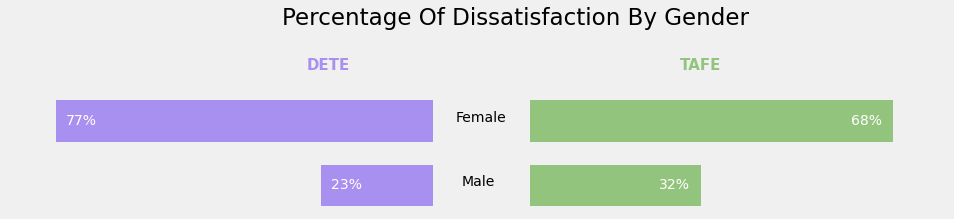

In [233]:
dissatisfaction_by_gender = create_df(dete, tafe, 'gender', 'dissatisfied')

plot_bars(dissatisfaction_by_gender.index, dissatisfaction_by_gender['dete_percent'], dissatisfaction_by_gender['tafe_percent'], fig = [15,2], left=[-17, 2],
          title={'x':14, 'y':2.5, 's':'Percentage Of Dissatisfaction By Gender', 'size':23},
          chart_titles={'bar1_x':9, 'bar1_y':1.8, 'bar2_x':30, 'bar2_y': 1.8},
          bar1_labels={'x':-19, 'y':-0.05, 's':'', 'color':'w'},
          bar2_labels={'x':-6, 'y':-0.05, 's':'', 'color':'w'},
          axis_labels={'Female': -12, 'Male': -10.8}, xlim=[-17, 70, 0.0, 80.0], y_coord = 1.0
)

We also see a similar pattern in both datasets:
* The overwhelming majority of dissatisfied employees are female (77% for DETE and 68% for TAFE). 

### 4.3: Percentage of dissatisfied employees by role

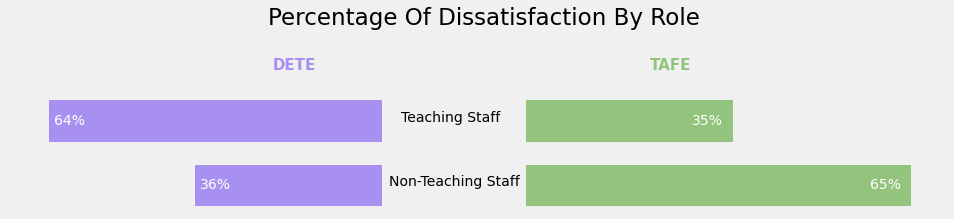

In [314]:
dissatisfaction_by_role = create_df(dete, tafe, 'role', 'dissatisfied')

plot_bars(dissatisfaction_by_role.index, dissatisfaction_by_role['dete_percent'], dissatisfaction_by_role['tafe_percent'], fig = [15,2], left=[-12, 9],
          title={'x':10, 'y':2.5, 's':'Percentage Of Dissatisfaction By Role', 'size':23},
          chart_titles={'bar1_x':9, 'bar1_y':1.8, 'bar2_x':30, 'bar2_y': 1.8},
          bar1_labels={'x':-13, 'y':-0.05, 's':'', 'color':'w'},
          bar2_labels={'x':2, 'y':-0.05, 's':'', 'color':'w'},
          axis_labels={'Teaching Staff': -12, 'Non-Teaching Staff': -14}, xlim=[-22, 60, 8.0, 80.0], y_coord = 1.0
)

We see a difference in the pattern in both datasets:
* For DETE, more teaching staff (64%) reported to be dissatisfied with the jobs
* While for TAFE, more non-teaching staff (65%) reported to be dissatisfied with their jobs.

### 4.4: Percentage of dissatisfied employees by employment status

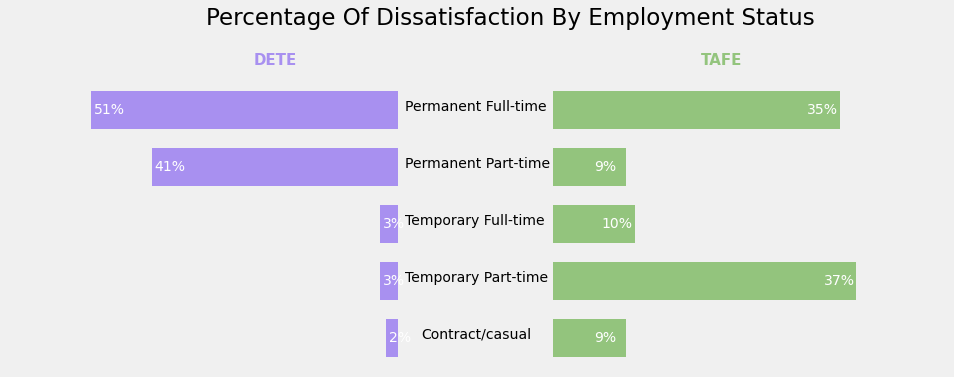

In [287]:
dissatisfaction_by_status = create_df(dete, tafe, 'employment_status', 'dissatisfied')

plot_bars(dissatisfaction_by_status.index, dissatisfaction_by_status['dete_percent'], dissatisfaction_by_status['tafe_percent'], fig = [15,5], left=[-15, 12],
          title={'x':17, 'y':5.5, 's':'Percentage Of Dissatisfaction By Employment Status', 'size':23},
          chart_titles={'bar1_x':9, 'bar1_y':4.8, 'bar2_x':30, 'bar2_y': 4.8},
          bar1_labels={'x':-15.5, 'y':-0.05, 's':'', 'color':'w'},
          bar2_labels={'x':8, 'y':-0.05, 's':'', 'color':'w'},
          axis_labels={'Permanent Full-time': -6, 'Permanent Part-time': -6, 'Temporary Full-time': -6, 'Temporary Part-time': -6, 'Contract/casual': -4}, xlim=[-21, 50, 8.0, 60.0], y_coord = 4.0
)

We also see some difference in the pattern here:
* For DETE, 51% of employees with permanent full-time roles where dissatisfied with their jobs. 
* While for TAFE, 37% of employees with temporary part-time roles where dissatisfied with their jobs, and 35% of employees with permanent full-time roles where dissatisfied with thier jobs.


## Conclusion

### Summary of Key Findings and Insights

When analyzing both datasets together, it was revealed that:

* Employees who worked for a relatively short period of time were more likely to resign due to dissatisfaction, constituting 48% of dissatisfied employees. On the other hand, veteran employees accounted for 24% of dissatisfied employees.

* A significant proportion of dissatisfied employees fall in the age group of 25 to 50 years, suggesting that employees in their prime working years might resign due to dissatisfaction and seek career changes.

* Young employees (aged 24 and below) had the lowest resignation rates, followed closely by older employees (55 years anf above), indicating that dissatisfaction leading to resignations is less prevalent in these age groups.

* Female employees comprised a substantial majority (73%) of the dissatisfied workforce, while male employees constituted only 27% of dissatisfied employees.

* Non-teaching staff reported slightly higher dissatisfaction levels (51%) compared to teaching staff (49%), suggesting a potential difference in job satisfaction between the two roles.

* Permanent full-time employees experienced higher dissatisfaction rates (43%) compared to other employment types, indicating potential issues specific to this employment category.

When analyzing both datasets separately, it was revealed that:

* Within DETE, veteran employees had the highest dissatisfaction rate (37%), while in TAFE, new employees had the highest dissatisfaction rate (68%). This indicates varying factors affecting employee satisfaction in different institutes.

* A significant majority (over 70%) of dissatisfied employees in both institutes were aged 24 and below, warranting attention to address potential issues faced by younger employees.

* Female employees were notably more dissatisfied (77% in DETE and 68% in TAFE), emphasizing the need to investigate potential gender-related concerns impacting job satisfaction.

* Job dissatisfaction was higher among teaching staff in DETE (64%), while in TAFE, non-teaching staff reported higher dissatisfaction (65%), indicating sector-specific concerns.

* The proportion of dissatisfied permanent full-time employees was higher in DETE (51%), while temporary part-time employees experienced higher dissatisfaction rates in TAFE (37%). Understanding the reasons behind these differences can aid in targeted interventions.


These key findings provide valuable insights into the factors contributing to employee resignations and dissatisfaction in the Department of Education, Training, and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. Addressing these insights can help improve employee satisfaction, retention, and overall organizational effectiveness.